<a href="https://colab.research.google.com/github/shir994/misis_seminars/blob/master/MiSiS_ldm_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this seminar we will examine the toy data for simulation of the LDM and neutrino scattering inside SND detector. All data presented here are Monte Carlo truth data. You task will be to plot some plots, make some guesses and train basic algorithms to try to distinguish between LDM events and neutrino based on observed MC variables.

In [4]:
!wget -O dm_kinematics.pkl https://cernbox.cern.ch/index.php/s/Sw18OVFaIUcafus/download
!wget -O nu_e_elastic_kinematics.pkl https://cernbox.cern.ch/index.php/s/5w73TtuwUjMoTMp/download
!wget -O nu_ccqe_elastic_kinematics.pkl https://cernbox.cern.ch/index.php/s/pQ2EnbWgY12tT3D/download  

--2019-10-08 14:30:12--  https://cernbox.cern.ch/index.php/s/Sw18OVFaIUcafus/download
Resolving cernbox.cern.ch (cernbox.cern.ch)... 128.142.32.26, 128.142.32.38
Connecting to cernbox.cern.ch (cernbox.cern.ch)|128.142.32.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27253102 (26M) [text/plain]
Saving to: ‘dm_kinematics.pkl’

dm_kinematics.pkl   100%[===================>]  25.99M  12.3MB/s    in 2.1s    

Last-modified header invalid -- time-stamp ignored.
2019-10-08 14:30:16 (12.3 MB/s) - ‘dm_kinematics.pkl’ saved [27253102/27253102]

--2019-10-08 14:30:17--  https://cernbox.cern.ch/index.php/s/pQ2EnbWgY12tT3D/download
Resolving cernbox.cern.ch (cernbox.cern.ch)... 128.142.32.26, 128.142.32.38
Connecting to cernbox.cern.ch (cernbox.cern.ch)|128.142.32.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 976696 (954K) [text/plain]
Saving to: ‘nu_e_elastic_kinematics.pkl’

nu_e_elastic_kinema 100%[===================>] 953.80K  1.40M

In [1]:
# Importing all the necessary packages 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import pickle

import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 2.0
my_cmap = plt.cm.jet
my_cmap.set_under('white')

In [2]:
def read_file(filename):
    with open(filename, 'rb') as f:
        raw_data = pickle.load(f)
    
    dict_data = {"init_E":[], "ele_E": [], "ele_theta": [], "ele_theta_to_particle": [], "init_theta":[]}
    for event in raw_data:
        if len(event) == 2:
            dict_data["init_E"].append(event['initial_particle']['E'])
            dict_data["init_theta"].append(event["initial_particle"]["theta"])           
            dict_data["ele_E"].append(event["ele_params"]["E"])
            dict_data["ele_theta"].append(event["ele_params"]["theta"])
            dict_data["ele_theta_to_particle"].append(event["ele_params"]["theta_to_particle"])
    return pd.DataFrame(dict_data, columns=["init_E", "ele_E", "ele_theta", "ele_theta_to_particle", "init_theta"])

In [3]:
# Load data
dm_df = read_file("dm_kinematics.pkl")
nu_df_el = read_file("nu_e_elastic_kinematics.pkl")
nu_df_ccqe = read_file("nu_ccqe_elastic_kinematics.pkl")


## Examining the data

Ok, we have donwloaded our data. Lets have a look at it.

In [4]:
dm_df.head()

,init_E,ele_E,ele_theta,ele_theta_to_particle,init_theta
0,28.118472,25.116745,0.009753,0.001671,0.008748
1,43.101253,9.552239,0.013601,0.009089,0.004586
2,14.734534,11.977019,0.007952,0.003211,0.006904
3,13.911240,8.074766,0.005738,0.006837,0.008029
4,6.034095,2.941430,0.014714,0.012004,0.005114


We have five initial features
- init_E - energy of neutrino
- init_theta - angle of neutrino wrt to Z-axis
- ele_E - energy of outgoing electron
- ele_theta - angle of outgoing electron wrt to Z-asis
- ele_theta_to_particle - angle of outgoing electron wrt to direction of neutrino 

What do you think we can actually observe in the detector? Can we approximate other variables somehow?

Lets plot some features to compare distributions for LDM and neutrino events.

Plots for EL

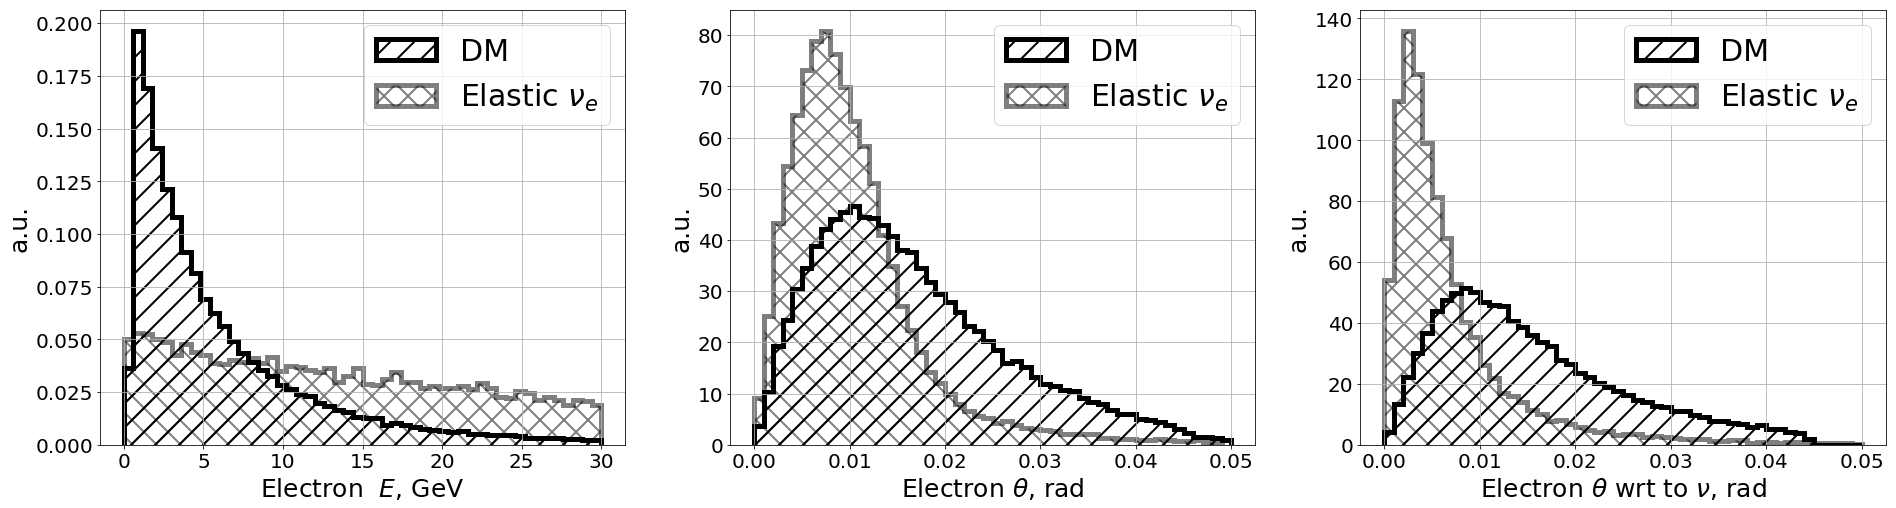

In [5]:
def add_plots(dm_data, nu_data, xlabel=None, x_range=None, nu_label="Elastic"):
    plt.hist(dm_data, density=True, bins=50, label="DM", range=x_range,
             edgecolor='k', hatch='/', fill=False, histtype='step', linewidth=5)
    plt.hist(nu_data, density=True, bins=50, alpha=0.5, label=r"{} $\nu_e$".format(nu_label), range=x_range,
             edgecolor='k', hatch='x', fill=False, histtype='step', linewidth=5)
    plt.grid()
    plt.legend(fontsize=30)
    plt.xlabel(xlabel, fontsize=25);
    plt.ylabel("a.u.", fontsize=25)
    plt.tick_params('both', labelsize=20)
    
plt.figure(figsize=(32, 8))
plt.subplot(1,3,1)
add_plots(dm_df["ele_E"], nu_df_el["ele_E"], "Electron  $E$, GeV",x_range=(0,30))
plt.subplot(1,3,2)
add_plots(dm_df["ele_theta"], nu_df_el["ele_theta"], r"Electron $\theta$, rad",x_range=(0, 0.05))
plt.subplot(1,3,3)
add_plots(dm_df["ele_theta_to_particle"], nu_df_el["ele_theta_to_particle"],
          r"Electron $\theta$ wrt to $\nu$, rad", x_range=(0, 0.05))

Plots for CCQE

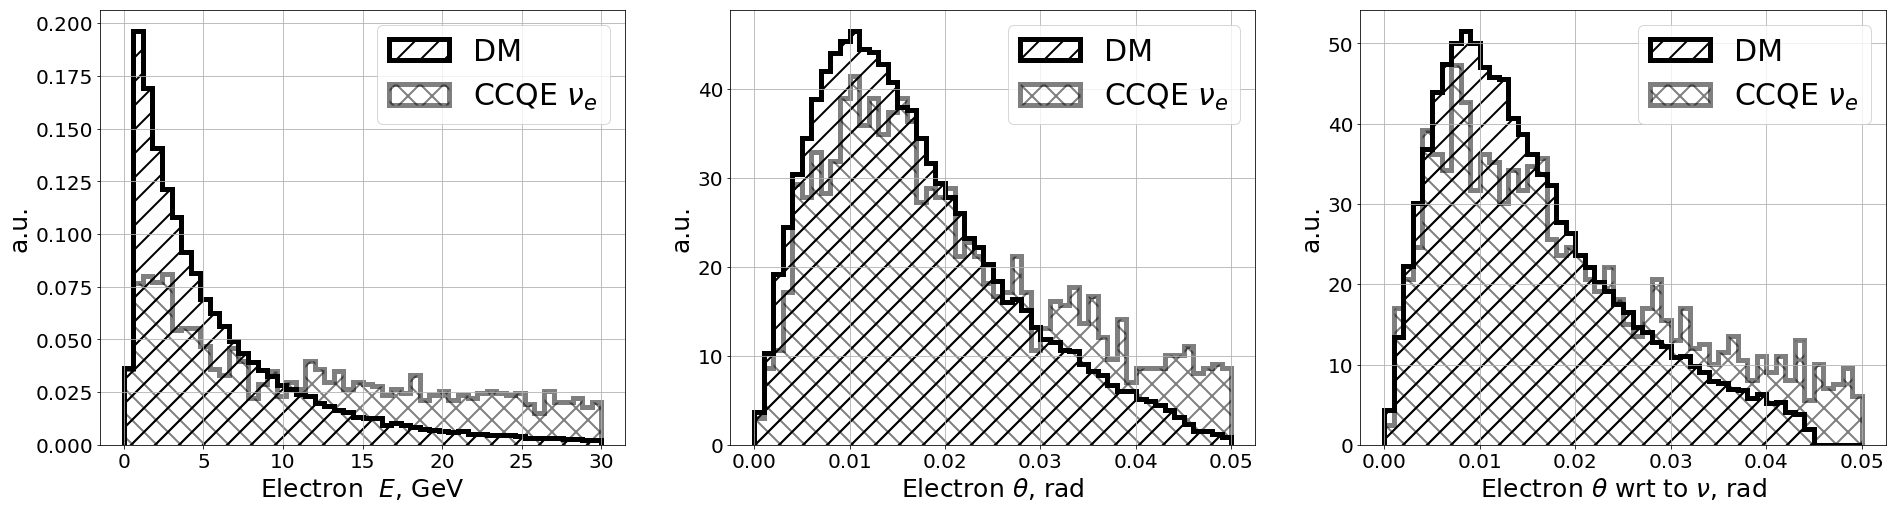

In [6]:
plt.figure(figsize=(32, 8))
plt.subplot(1,3,1)
add_plots(dm_df["ele_E"], nu_df_ccqe["ele_E"], "Electron  $E$, GeV",x_range=(0,30), nu_label="CCQE")
plt.subplot(1,3,2)
add_plots(dm_df["ele_theta"], nu_df_ccqe["ele_theta"], r"Electron $\theta$, rad",x_range=(0, 0.05), nu_label="CCQE")
plt.subplot(1,3,3)
add_plots(dm_df["ele_theta_to_particle"], nu_df_ccqe["ele_theta_to_particle"],
          r"Electron $\theta$ wrt to $\nu$, rad", x_range=(0, 0.05), nu_label="CCQE")

Looks like for CCQE its quite hard to distinguish, lets plot 2d hists!

Ok, now its your turn to quickly draw some plots.
- Using the code above plot 2D histogram(use *plt.hist2d*) of electron energy ("ele_E") vs electron angle ("ele_theta") for LDM, EL, CCCQE
- Sacle histogram to be in the same size in x

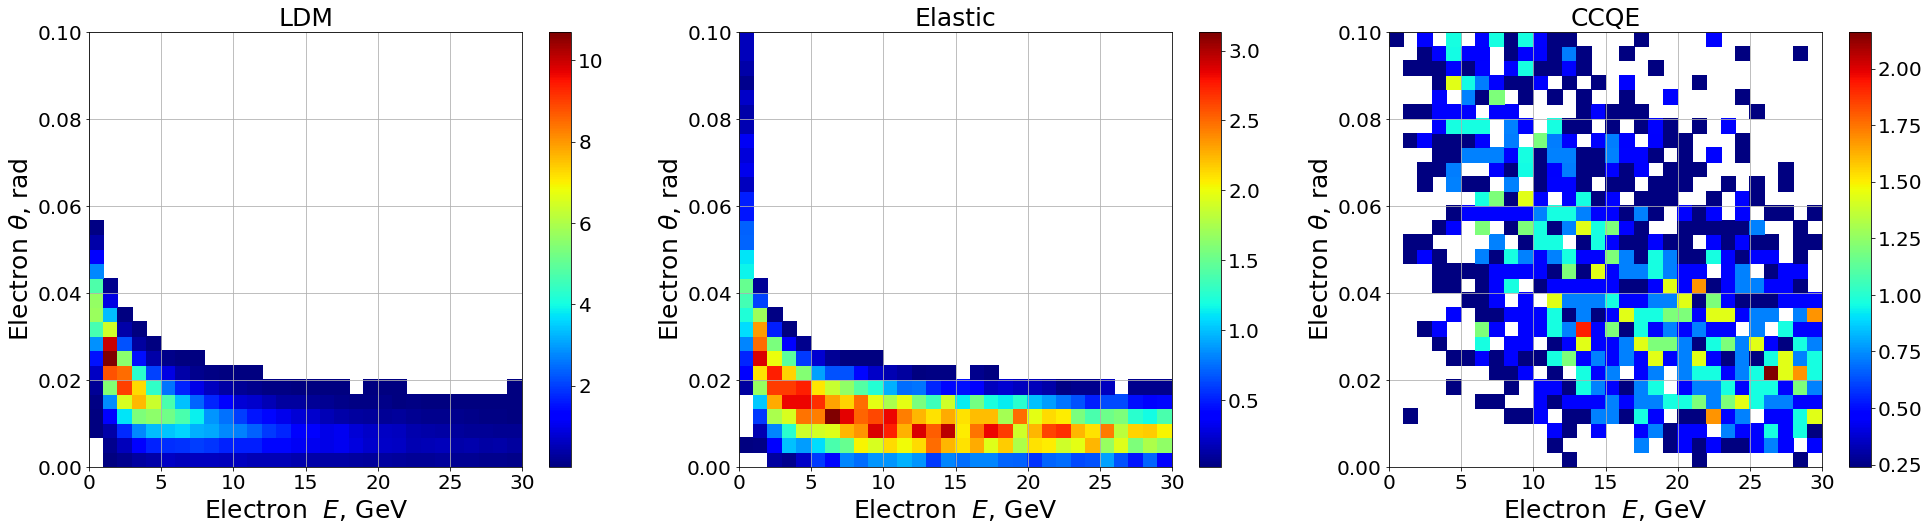

In [7]:
def add_plots(dm_data, nu_data, xlabel=None, title=None):
    plt.hist2d(dm_data, nu_data, normed=True, bins=30, cmin=0.000000001, cmap=my_cmap,
              range=((0, 30), (0, 0.1)))
    plt.grid()
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=20) 
    plt.xlabel(xlabel, fontsize=25);
    plt.ylabel(r"Electron $\theta$, rad", fontsize=25);
    plt.tick_params('both', labelsize=20)
    plt.title(title, fontsize=25)
    
plt.figure(figsize=(33, 8))
plt.subplot(1,3,1)
add_plots(dm_df["ele_E"], dm_df["ele_theta"], xlabel="Electron  $E$, GeV", title="LDM")
plt.subplot(1,3,2)
add_plots(nu_df_el["ele_E"], nu_df_el["ele_theta"], xlabel="Electron  $E$, GeV", title="Elastic")
plt.subplot(1,3,3)
add_plots(nu_df_ccqe["ele_E"], nu_df_ccqe["ele_theta"], xlabel="Electron  $E$, GeV", title="CCQE")

What do you observe? How can we improve this very basic visual analysis?

# Fit some simple ML algorithm

Now, lets use the very basic alogirthms to decide what is LDM and what is noise!

In [8]:
# import packages we want to use
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score

Lets first preprocess data:

In [9]:
dm_df.shape, nu_df_el.shape, nu_df_ccqe.shape

((81585, 5), (20912, 5), (3152, 5))

In [10]:
def perpare_data(dm_df, nu_df_el, nu_df_ccqe):
    # We subsample data to make equal proportion of LDM events(signal) and ne_e elastic(background)
    # This is done for our metrics to be representative
    dm_df_sample = dm_df.sample(n=nu_df_el.shape[0], random_state=1543)
    
    # Label data
    dm_df_sample['label'] = 1
    nu_df_el['label'] = 0
    nu_df_ccqe['label'] = 2

    # and join in aggregative table
    joined_data = pd.concat((dm_df_sample, nu_df_el, nu_df_ccqe))
    joined_data = joined_data.sample(frac=1, replace=False)    
    print(joined_data.head())
    
    # Separate label from our discriminative features
    y = joined_data['label']
    joined_data = joined_data.drop(['label'], axis=1)
    ccqe_indeces = np.where(y==2)[0]
    y[y==2] = 0
    return joined_data, y, ccqe_indeces

In [11]:
joined_data, y, ccqe_indeces = perpare_data(dm_df, nu_df_el, nu_df_ccqe)

          init_E      ele_E  ele_theta  ele_theta_to_particle  init_theta  \
78905  52.982560   0.614529   0.037254               0.040533    0.003282   
30693  19.836589   2.324763   0.023878               0.019620    0.007846   
6455   57.461882  20.279170   0.012529               0.005711    0.009943   
14752  41.821667  17.064851   0.012648               0.005954    0.007323   
11562  26.899019  17.576970   0.013767               0.004489    0.010162   

       label  
78905      1  
30693      1  
6455       0  
14752      0  
11562      0  


Now, as for a bare curiosity lets first train algortihm only using one feature - energy of the electron

In [12]:
# This is current columns of the dataset
joined_data.columns

Index(['init_E', 'ele_E', 'ele_theta', 'ele_theta_to_particle', 'init_theta'], dtype='object')

In [13]:
# Select only init_E column in a separate variable, name it e_only_train
e_only_train = joined_data[['init_E']]

## The output of our algo will be probabilities of an event to belong to class 1

In [14]:
model = LogisticRegression(C=0.001)

probs = cross_val_predict(model, e_only_train, y=y, cv=5, n_jobs=4, method='predict_proba')

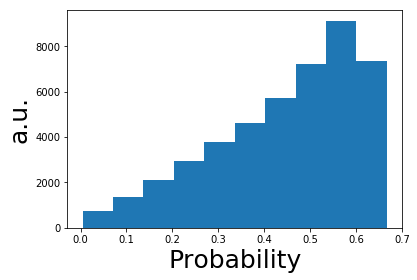

In [15]:
plt.hist(probs[:,1]);
plt.xlabel("Probability", fontsize=25)
plt.ylabel("a.u.", fontsize=25);

Not very inforomative right? Of course, in physics we have a stanard metrics how we can define the performance of the algorigthm, for example, $\frac{S}{\sqrt{B}}$. In our case we will consider signal efficiency VS background rejection. Sklearn has inbulid functions to calculate to calculate almost what we need, just defined in mathematical terms:

In [16]:
fpr,tpr,t = roc_curve(y.values, probs[:, 1], pos_label=1)

The function above returns False Positive Rate(FPR) which is defined as:
$$
FPR = \frac{FP}{FP + TN}
$$

and True Positive Rate(TPR) which is defined as
$$
TPR = \frac{TP}{TP + FN}
$$
This definitions are basically what we need? How do they correspond to signal efficiency and background rejection? 

Now, plot the dependecy of signal efficiency VS background rejection as a curve.

AVG precision 0.6210157184073868


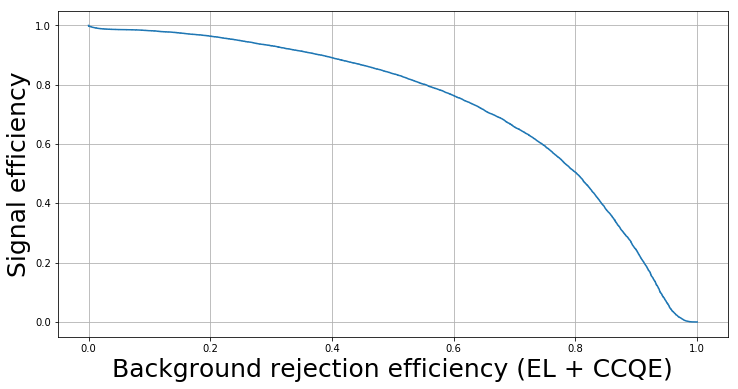

In [17]:
plt.figure(figsize=(12,6))
plt.plot(1 - fpr, tpr)
plt.grid()
plt.xlabel("Background rejection efficiency (EL + CCQE)", fontsize=25)
plt.ylabel("Signal efficiency", fontsize=25);
print("AVG precision", average_precision_score(y.values, probs[:, 1], pos_label=1))

Somewhat expected, isnt it? As you can see, the quality is qutie low. This was obious for the initial plots, we have plotted in the beginning. Now lets now repeat the procedure, using all the features we have!

In [18]:
def fit_and_plot(model, data, y):
    probs = cross_val_predict(model, data, y=y, cv=5, n_jobs=4, method='predict_proba')
    fpr,tpr,t = roc_curve(y.values, probs[:, 1], pos_label=1)
    plt.figure(figsize=(12,6))
    plt.plot(1 - fpr, tpr)
    plt.grid()
    plt.xlabel("Background rejection efficiency (EL + CCQE)", fontsize=25)
    plt.ylabel("Signal efficiency", fontsize=25);
    print("AVG precision", average_precision_score(y.values, probs[:, 1], pos_label=1))

AVG precision 0.7247907088233773


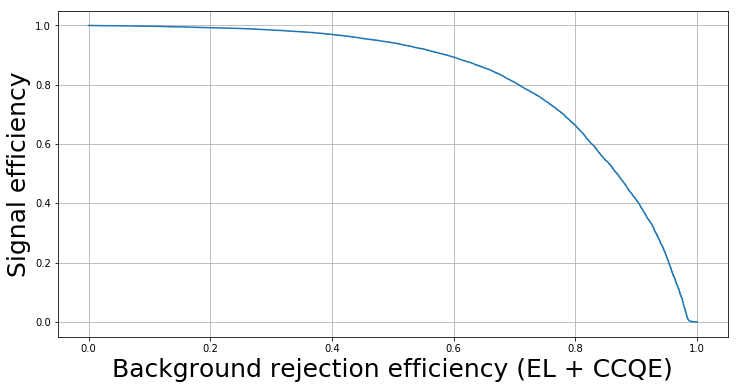

In [19]:
model = LogisticRegression(C=0.001)
fit_and_plot(model, joined_data, y)

Much better, isnt it? But, do we have some features, we usually use in physics, that we can create from the given data? YES! We can can create, for example, $E_T$. So, add $E_T$ to the data and refit the algorithm.

In [21]:
joined_data["E_t"] = joined_data["ele_E"] * np.sin(joined_data["ele_theta"])
joined_data["E_t_rel"] = joined_data["ele_E"] * np.sin(joined_data["ele_theta_to_particle"])

AVG precision 0.7383931159386143


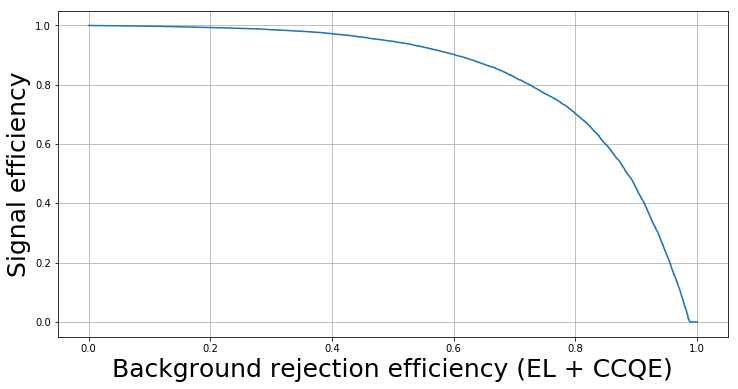

In [22]:
model = LogisticRegression(C=0.001)
fit_and_plot(model, joined_data, y)

OK? But, there is still a problem. Lets look at the data again. Do you notice something special about data distribution? So, is it possible to improve the algorithm by basically doing "nothing"?

In [24]:
joined_data.head()

,init_E,ele_E,ele_theta,ele_theta_to_particle,init_theta,E_t,E_t_rel
78905,52.982560,0.614529,0.037254,0.040533,0.003282,0.022888,0.024902
30693,19.836589,2.324763,0.023878,0.019620,0.007846,0.055505,0.045609
6455,57.461882,20.279170,0.012529,0.005711,0.009943,0.254068,0.115805
14752,41.821667,17.064851,0.012648,0.005954,0.007323,0.215833,0.101606
11562,26.899019,17.576970,0.013767,0.004489,0.010162,0.241967,0.078902


AVG precision 0.8131046860340955


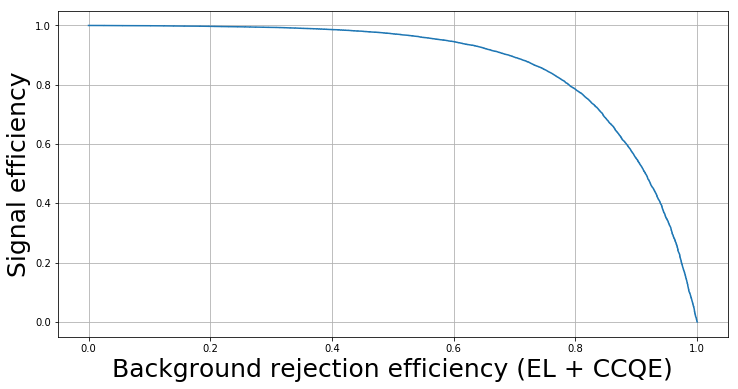

In [25]:
model = LogisticRegression(C=0.001)
sc = StandardScaler()
fit_and_plot(model, sc.fit_transform(joined_data), y)

Finally, we can try different algorithm

AVG precision 0.8356669236624988


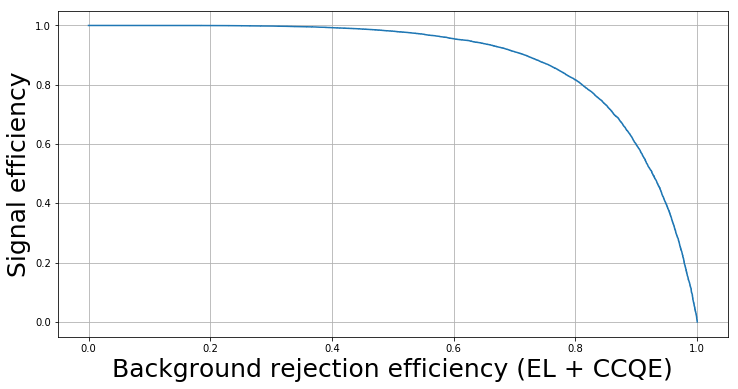

In [23]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=500)
feature_columns = ['ele_E', 'ele_theta', 'ele_theta_to_particle', 'E_t', "init_theta", "E_t_rel"]
fit_and_plot(model, joined_data[feature_columns], y)

YAY much better out of the box!

In [26]:
model = XGBClassifier(n_estimators=500)
probs = cross_val_predict(model, joined_data[feature_columns], y=y, cv=5, n_jobs=4, method='predict_proba')

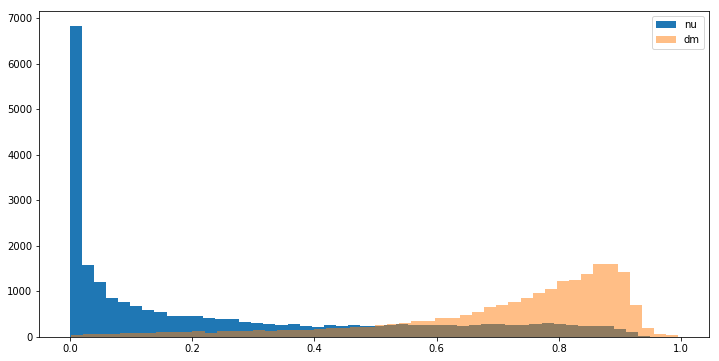

In [27]:
plt.figure(figsize=(12,6))
plt.hist(probs[y.values == 0, 1], bins=50, label='nu')
plt.hist(probs[y.values == 1, 1], bins=50,alpha=0.5, label='dm');
plt.legend()

We can also study answer distribution and go into the depth of the why we get this particular answers,
sample data in the right propotion to the reaction cross-secition and etc. All the above is just a toy example to give you and idea what is day to day task.

Bonus quest: try to do GridSearch and improve the resuls!

In [0]:
gs = GridSearchCV(model, param_grid={"C": np.logspace(-3, 3, 10)}, scoring="roc_auc", n_jobs=3, cv=5)
gs.fit(StandardScaler().fit_transform(joined_data[feature_columns]), y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': array([1.00000e-03, 4.64159e-03, 2.15443e-02, 1.00000e-01, 4.64159e-01,
       2.15443e+00, 1.00000e+01, 4.64159e+01, 2.15443e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [0]:
gs.best_score_, gs.best_params_

(0.8171997586850507, {'C': 0.001})